In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
# Change it to the path of your dmbd movie datas
path=("./data")

In [3]:
df_movies=pd.read_csv(path + '/IMDb_movies.csv', sep=',')
df_names=pd.read_csv(path + '/IMDb_names.csv',sep=',')
df_title=pd.read_csv(path + '/IMDb_title_principals.csv', sep=',')
df_ratings=pd.read_csv(path + '/IMDb_ratings.csv', sep =',')

D:\Users\malou\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# To get the size of our df
print(df_ratings.shape,
df_names.shape,
df_movies.shape,
df_title.shape)


(85855, 49) (297705, 17) (85855, 22) (835513, 6)


In [112]:
df_title

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"
...,...,...,...,...,...,...
835508,tt9914942,6,nm3678448,writer,NaN,NaN
835509,tt9914942,7,nm9361716,writer,novel,NaN
835510,tt9914942,8,nm2262072,composer,NaN,NaN
835511,tt9914942,9,nm1966322,cinematographer,NaN,NaN


In [180]:
# Basic infos on our df
df_title.dtypes

imdb_title_id    object
ordering          int64
imdb_name_id     object
category         object
job              object
characters       object
dtype: object

Text(0.5, 1.0, 'Répartition des notes')

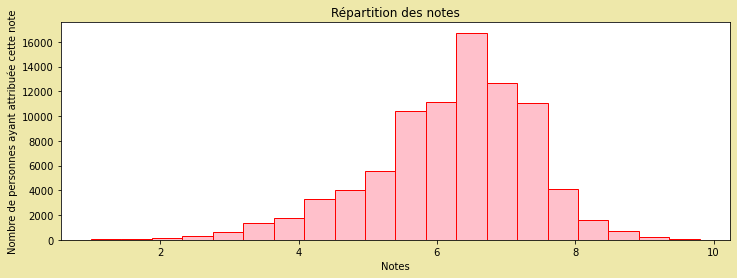

In [181]:
# Histogram to get the global grades' repartition
plt.figure(figsize = (12, 4), facecolor='palegoldenrod', edgecolor='blue')
plt.hist(df_ratings["mean_vote"], color='pink', edgecolor='red', bins=20)
plt.xlabel('Notes')
plt.ylabel('Nombre de personnes ayant attribuée cette note')
plt.title('Répartition des notes')

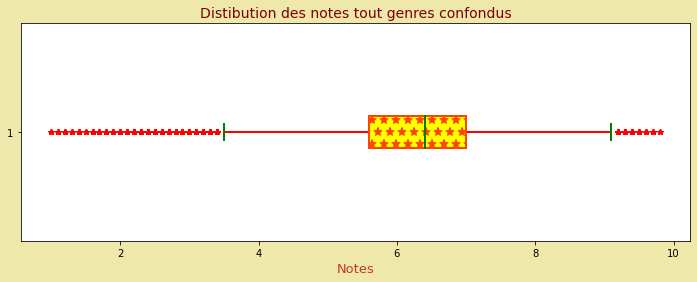

In [182]:
#Boite à moustache de la distribution des notes
plt.figure(figsize=(12, 4), facecolor='palegoldenrod')
BP = plt.boxplot(df_ratings["mean_vote"], sym='r*', patch_artist=True, vert=0)
plt.xlabel("Notes", fontsize=13, color='#c0392b')
for element in BP['medians']:
    element.set_color('green')
    element.set_linewidth(2)
for element in BP['boxes']:
    element.set_edgecolor('orangered')
    element.set_facecolor('yellow')
    element.set_linewidth(2)
    element.set_fill(True)
    element.set_hatch('*')
for element in BP['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in BP['caps']:
    element.set_color('green')
    element.set_linewidth(2)
plt.title("Distibution des notes tout genres confondus", fontsize=14, color='maroon')

plt.show()

In [183]:
df_ratings["mean_vote"].value_counts().head(10)

6.4    3372
6.5    3366
6.7    3361
6.8    3349
6.6    3345
6.3    3287
6.9    3204
7.0    3099
7.1    3020
6.2    2957
Name: mean_vote, dtype: int64

In [184]:
S = df_ratings["mean_vote"].value_counts(normalize=True)*100
S = S.head(10)
S = round(S,2)
S

6.4    3.93
6.5    3.92
6.7    3.91
6.8    3.90
6.6    3.90
6.3    3.83
6.9    3.73
7.0    3.61
7.1    3.52
6.2    3.44
Name: mean_vote, dtype: float64

In [185]:
# We select the 4 essential features from our df
dfm = df_movies[["title", "year", "genre", "avg_vote"]] 
dfm.shape


(85855, 4)

In [186]:
# We delete the film whose year is "TV Movie 2019"
dfm = dfm.drop([0, 83917]) 

In [187]:
dfm.head()

,title,year,genre,avg_vote
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",6.1
2,Den sorte drøm,1911,Drama,5.8
3,Cleopatra,1912,"Drama, History",5.2
4,L'Inferno,1911,"Adventure, Drama, Fantasy",7.0
5,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",5.7


Text(0.5, 1.0, 'Les 10 notes les plus attribuées')

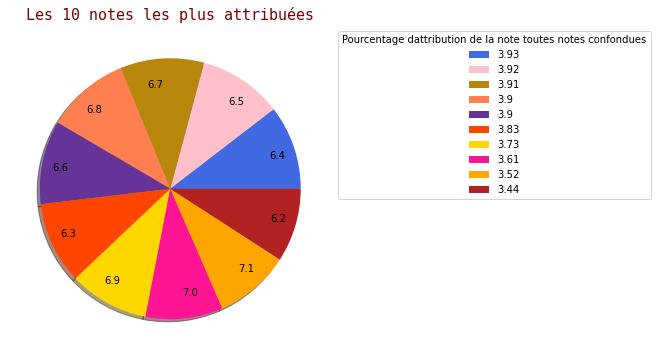

In [188]:
# Pie of the 10 more attributed grades
plt.figure(figsize = (6, 6))
plt.pie(S, labels=S.index.values, labeldistance=0.8, colors=['royalblue', 'pink', 
'darkgoldenrod', 'coral', 'rebeccapurple', 'orangered', 'gold', 'deeppink', 'orange', 'firebrick'], shadow=True)

plt.legend(S, bbox_to_anchor=(1, 1), loc='best', prop={'size': 10}, title="Pourcentage d'attribution de la note toutes notes confondues")
plt.title("Les 10 notes les plus attribuées", fontsize=15, color='maroon', family='monospace')

Text(0.5, 1.0, 'Les 10 notes les plus attribuées')

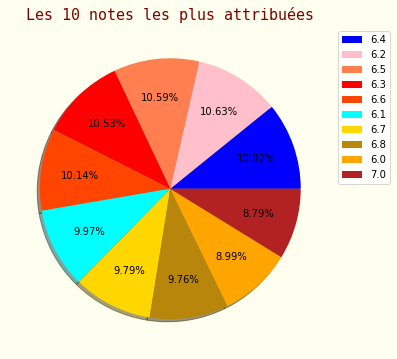

In [189]:
# Pie of the most attributed grades
plt.figure(figsize=(6, 6), facecolor='ivory', edgecolor='blue')
plt.pie(dfm['avg_vote'].value_counts().head(10), colors=['blue', 'pink', 'coral', 'red', 'orangered', 'cyan', 'gold', 'darkgoldenrod', 'orange', 'firebrick'],
         autopct=lambda x: str(round(x, 2)) + '%', pctdistance=0.7, labeldistance=1.4, shadow=True)

plt.legend(dfm['avg_vote'].value_counts().head(10).index.values, bbox_to_anchor=(1, 1), loc='best', prop={'size': 10})
plt.title('Les 10 notes les plus attribuées', fontsize=15, color='maroon', family='monospace')

# Quel est le genre de film le plus représenté dans les données ? 

In [190]:
# We want to get the 10 more represented types
D = dfm["genre"].value_counts().head(10)
D


Drama                     12543
Comedy                     7693
Comedy, Drama              4039
Drama, Romance             3455
Comedy, Romance            2508
Comedy, Drama, Romance     2293
Horror                     2268
Drama, Thriller            1348
Crime, Drama               1343
Action, Crime, Drama       1310
Name: genre, dtype: int64

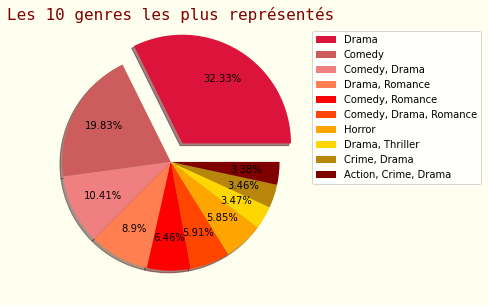

In [191]:
# We use these results to do a pie
plt.figure(figsize=(5, 5), facecolor='ivory', edgecolor='blue')
plt.pie(D, colors=['crimson', 'indianred', 'lightcoral', 'coral', 'red', 'orangered', 'orange', 'gold', 'darkgoldenrod', 'maroon'],
           explode=[0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           autopct=lambda x: str(round(x, 2)) + '%',
           pctdistance=0.7, labeldistance=1.4,
           shadow=True)
plt.title('Les 10 genres les plus représentés', family='monospace', color='maroon', fontsize=16)
plt.legend(D.index.values, bbox_to_anchor=(1, 1), loc='best', prop={'size': 10})

In [192]:
# To extract the unique type of a film : the count is > to the nb of films bc each film can hhave more than one type
from sklearn.feature_extraction.text import CountVectorizer
# To remove all NAs
temp = dfm.genre.dropna()
# CountVectorizer to split types in a unique one : each word is a vector
vec = CountVectorizer(analyzer='word').fit(temp) #token_pattern='(?u)\\b[\\w-]+\\b' dans CountVectorizer, ici fait par défaut 
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names()
np.array(unique_genres) # Array (table) of 'uniques' types

array(['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'fi', 'film',
       'history', 'horror', 'music', 'musical', 'mystery', 'news', 'noir',
       'reality', 'romance', 'sci', 'sport', 'thriller', 'tv', 'war',
       'western'], dtype='<U11')

In [193]:
# Number of existing types
len(np.array(unique_genres))

28

In [194]:
# Counting the nb of films by type
genres = pd.DataFrame(bag_of_genres.todense(), columns=unique_genres, index=temp.index) # Df of unique types
sorted_genres = pd.Series(genres.sum()).sort_values(ascending=False) # Nb of film by type
sorted_genres.head()

drama       47110
comedy      29367
romance     14127
action      12948
thriller    11388
dtype: int64

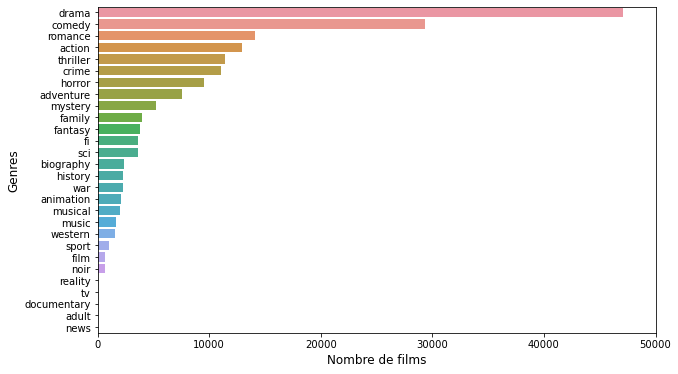

In [195]:
# barplot of the main unique types
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_genres.values,y=sorted_genres.index)
plt.xlabel("Nombre de films", fontsize=12)
plt.gca().set_xlim(0, 50000)
plt.ylabel("Genres", fontsize=12)
plt.tick_params(axis='both', labelsize=10)

plt.show()

# Quelle est la répartition des notes de films pour chaque genre ? 

Comme nous avons 1257 genres différents, ça serait illisible de faire un graphique de la répartition des notes pour chacun
Nous essayerons deux manières pour s'approcher au mieux de ce qui est demandé.

In [196]:
# 20 more represented types
dfm["genre"].value_counts().head(20)

Drama                        12543
Comedy                        7693
Comedy, Drama                 4039
Drama, Romance                3455
Comedy, Romance               2508
Comedy, Drama, Romance        2293
Horror                        2268
Drama, Thriller               1348
Crime, Drama                  1343
Action, Crime, Drama          1310
Thriller                      1245
Horror, Thriller              1214
Crime, Drama, Thriller        1021
Action, Drama                  881
Drama, War                     761
Action                         715
Crime, Drama, Mystery          667
Action, Adventure, Drama       608
Action, Adventure, Comedy      606
Comedy, Crime                  592
Name: genre, dtype: int64

In [197]:
g = dfm.groupby("genre") #.groupby() to cut dfm in groups of 'genre'

In [198]:
# Sub-df for eahc of the 10 first film types
DR = g.get_group('Drama')
CO = g.get_group('Comedy')
CD = g.get_group('Comedy, Drama')
DRO = g.get_group('Drama, Romance')
CR = g.get_group('Comedy, Romance')
CDR = g.get_group('Comedy, Drama, Romance')
DT = g.get_group('Drama, Thriller')
CRD = g.get_group('Crime, Drama')
HO = g.get_group('Horror')
ACD = g.get_group('Action, Crime, Drama')
RO = g.get_group('Romance')
AC = g.get_group('Action')
AAD = g.get_group('Action, Adventure, Drama')
AAC = g.get_group('Action, Adventure, Comedy')
TH = g.get_group('Thriller')
CDT = g.get_group('Crime, Drama, Thriller')
CRI = g.get_group('Crime')
CC = g.get_group('Comedy, Crime')
CDM = g.get_group('Crime, Drama, Mystery')
HT = g.get_group('Horror, Thriller')

In [199]:
# Stocking a list of types in T df
T = pd.concat([HO, TH, DR, CO, AC, DT, ACD, CDM, RO, CRD])
T.head()

,title,year,genre,avg_vote
29,Der Golem,1915,Horror,6.8
92,Furcht,1917,Horror,6.1
195,Genuine,1920,Horror,6.0
435,Il fantasma dell'opera,1925,Horror,7.6
572,Il fantasma del castello,1927,Horror,6.8


In [200]:
T.shape # Nb of films

(29570, 4)

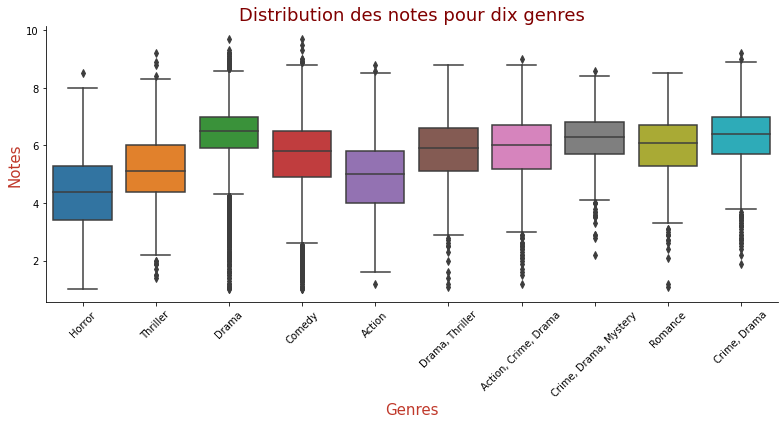

In [201]:
# Boxplot for each type in T 
sns.catplot(x='genre', y='avg_vote', kind='box', data=T, height=6, aspect=11/6)
plt.xlabel('Genres', fontsize=15, color='#c0392b')
plt.ylabel("Notes", fontsize=15, color='#c0392b')
plt.title("Distribution des notes pour dix genres", fontsize=18, color='maroon')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [202]:
# concat df under a simplified type
drama = pd.concat([DR, CD])
drama['genre'] = 'Drama' # replace every type by a unique simplified one: Drama value


In [203]:
# Same for the 5 other main types
romance = pd.concat([DRO, RO, CR, CDR])
romance['genre'] = 'Romance'

thriller = pd.concat([TH, CDT, DT])
thriller['genre'] = 'Thriller'

action = pd.concat([AC, AAD, AAC, ACD])
action['genre'] = 'Action'

crime = pd.concat([CRI, CRD, CC, CDM])
crime['genre'] = 'Crime'

horror = pd.concat([HO, HT])
horror['genre'] = 'Horror'

In [204]:
# To concat dfs above with CO:comedy
V = pd.concat([horror, drama, romance, action, thriller, crime, CO])
V.shape
# Ce nouveau dataframe compte 46 073 films sur les 85 855 qu'on a dans notre base de données, ce n'est donc pas 
# exactement représentatif, mais on a quand même plus de la moitié des films et les genres les plus populaires 

(46073, 4)

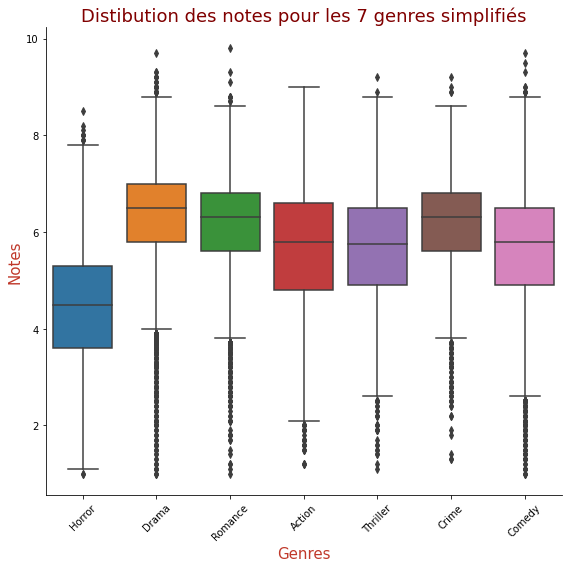

In [205]:
# Boxplot to see the grades repartition by type
sns.catplot(x='genre', y='avg_vote', kind='box', data=V, height=8, aspect= 8/8)
plt.xlabel('Genres', fontsize=15, color='#c0392b')
plt.ylabel("Notes", fontsize=15, color='#c0392b')
plt.title("Distibution des notes pour les 7 genres simplifiés", fontsize=18, color='maroon')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# L’évolution du nombre de films produits au cours des années

In [206]:
dfm['year'] = dfm['year'].astype(int) # Changes 'year' type in int

In [207]:
# To get the number of film by year
A = dfm["year"].value_counts()
print(A)

2017    3329
2018    3257
2016    3138
2015    2977
2014    2942
        ... 
1914      22
1913      13
1912       5
1911       5
1906       1
Name: year, Length: 111, dtype: int64


In [208]:
# Stocking the above results in a df
data = {'Annee':A.index.values, 'Nombre de films sortis cette année':A}
dfy = pd.DataFrame(data)
dfy

,Annee,Nombre de films sortis cette année
2017,2017,3329
2018,2018,3257
2016,2016,3138
2015,2015,2977
2014,2014,2942
...,...,...
1914,1914,22
1913,1913,13
1912,1912,5
1911,1911,5


In [209]:
# Ascending ordering
dfy = dfy.sort_values(by='Annee')
dfy

,Annee,Nombre de films sortis cette année
1906,1906,1
1911,1911,5
1912,1912,5
1913,1913,13
1914,1914,22
...,...,...
2016,2016,3138
2017,2017,3329
2018,2018,3257
2019,2019,2841


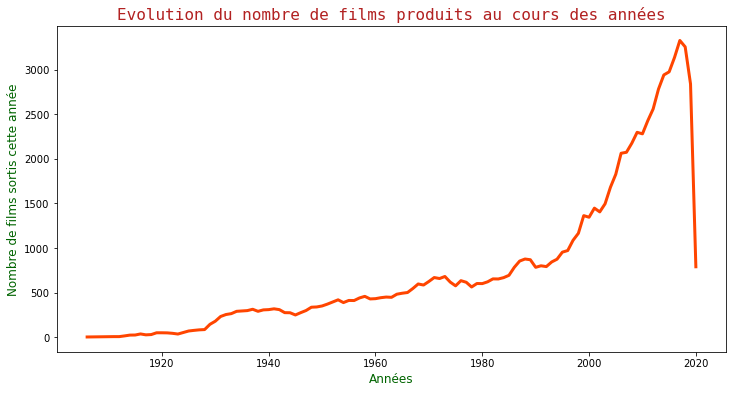

In [210]:
plt.figure(figsize=(12, 6))
x = dfy['Annee']
y = dfy['Nombre de films sortis cette année']
plt.xlabel('Années', fontsize=12, color='darkgreen')
plt.ylabel('Nombre de films sortis cette année', fontsize=12, color='darkgreen')
plt.title('Evolution du nombre de films produits au cours des années', family='monospace', color='firebrick', fontsize=16)
plt.plot(x, y, color='orangered', linewidth=3)
plt.show()

# Autres graphiques intéressants

ValueError: `bins` must be positive, when an integer

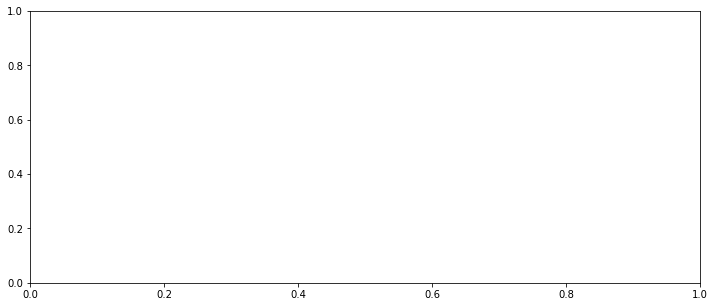

In [212]:
# Garde repartition only for drama
plt.figure(figsize=(12, 5))

plt.hist(DR['avg_vote'], color='indianred', edgecolor='orange', bins=0, hatch='o')
plt.xlabel('Notes')
plt.ylabel('Nombre de personnes ayant attribuée cette note')
plt.title('Répartition des notes pour les films drama')

Text(0.5, 1.0, 'Répartition des notes pour les films comédies')

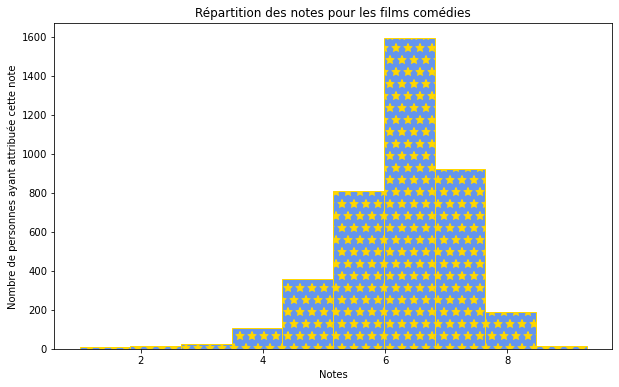

In [213]:
# Same for comedy
plt.figure(figsize=(10,6))

plt.hist(CD['avg_vote'], color='cornflowerblue', edgecolor='gold', bins=10, hatch='*')
plt.xlabel('Notes')
plt.ylabel('Nombre de personnes ayant attribuée cette note')
plt.title('Répartition des notes pour les films comédies')

In [214]:
# 10 most represented jobs in our df_title
dft = df_title['job'].dropna()
dft.value_counts().head(10)

producer                   97837
screenplay                 23953
director of photography    10251
written by                 10234
story                       9511
writer                      7028
novel                       4970
dialogue                    3026
executive producer          2494
screen play                 2115
Name: job, dtype: int64

Text(0.5, 1.0, 'Les 10 métiers les plus représentés')

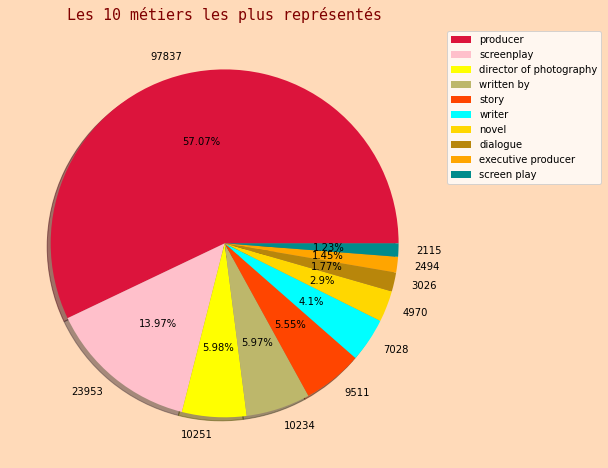

In [215]:
plt.figure(figsize=(8, 8), facecolor='peachpuff', edgecolor='blue')
plt.pie(dft.value_counts().head(10), colors=['crimson', 'pink', 'yellow', 'darkkhaki', 'orangered', 'cyan', 'gold', 'darkgoldenrod', 'orange', 'darkcyan'],
labels = dft.value_counts().head(10), autopct=lambda x: str(round(x, 2)) + '%', labeldistance=1.1, shadow=True)

plt.legend(dft.value_counts().head(10).index.values, bbox_to_anchor=(1, 1), loc='best', prop={'size': 10})
plt.title('Les 10 métiers les plus représentés', fontsize=15, color='maroon', family='monospace')

In [216]:
# Dans df_title la colonne category et job sont similaires et il y a eu des mélanges, on rassemble donc les deux dans "job"

In [217]:
dfc = df_title['category'].dropna()
dfc

0                 actress
1                   actor
2                   actor
3                director
4                 actress
               ...       
835508             writer
835509             writer
835510           composer
835511    cinematographer
835512             editor
Name: category, Length: 835513, dtype: object

In [218]:
job = pd.concat([dft, dfc])

In [219]:
# 10 most represented job
job.value_counts().head(10)

actor                      222337
producer                   198929
actress                    133414
writer                     129821
director                    88970
composer                    67257
cinematographer             55424
editor                      33783
screenplay                  23953
director of photography     10251
dtype: int64

Text(0.5, 1.0, 'Les 10 métiers les plus représentés')

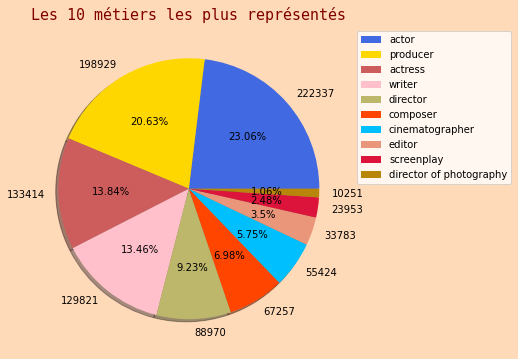

In [220]:
plt.figure(figsize=(6, 6), facecolor='peachpuff', edgecolor='blue')
plt.pie(job.value_counts().head(10), colors=['royalblue', 'gold', 'indianred', 'pink', 'darkkhaki', 'orangered', 'deepskyblue', 'darksalmon', 'crimson', 'darkgoldenrod', 'orange', 'firebrick'],
        labels = job.value_counts().head(10), labeldistance=1.1, autopct=lambda x: str(round(x, 2)) + '%', shadow=True)

plt.legend(job.value_counts().head(10).index.values, bbox_to_anchor=(1, 1), loc='best', prop={'size': 10})
plt.title('Les 10 métiers les plus représentés', fontsize=15, color='maroon',family='monospace')

In [221]:
# Main languages
u = df_movies["language"].dropna()
u.value_counts().head(10)

English             35939
French               3903
Spanish              2831
Japanese             2826
Italian              2731
Hindi                2106
German               1761
Turkish              1355
Russian              1345
English, Spanish     1108
Name: language, dtype: int64

Text(0.5, 1.0, 'En quelle langue sont les films de notre base de données?')

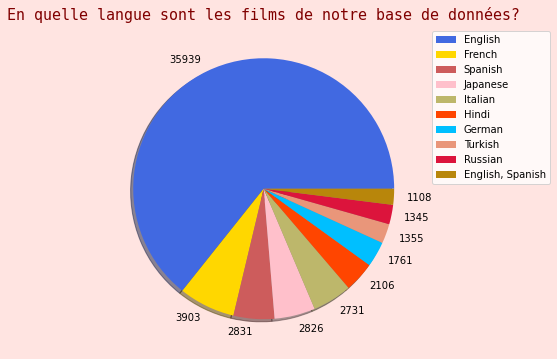

In [222]:
plt.figure(figsize=(6, 6), facecolor='mistyrose', edgecolor='blue')
plt.pie(u.value_counts().head(10), colors=['royalblue', 'gold', 'indianred', 'pink', 'darkkhaki', 'orangered', 'deepskyblue', 'darksalmon', 'crimson', 'darkgoldenrod', 'orange', 'firebrick'],
        labels = u.value_counts().head(10), labeldistance=1.1, shadow=True)

plt.legend(u.value_counts().head(10).index.values, bbox_to_anchor=(1, 1), loc='best', prop={'size': 10})
plt.title('En quelle langue sont les films de notre base de données?', fontsize=15, color='maroon', family='monospace')